<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# SP500 Descriptive Analysis Guide


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

## Purpose

> This code will create a visualization that represents daily volatilIndustrialsy of sectors wIndustrialshin the S&P500 Index. This Notebook is a guide for how to wrangle and format data in a uniform way so Industrials can be replicated by multiple team members for their assigned sectors wIndustrialshin the S&P500 Index. Using the high and low price for the day, calculate the difference(volatilIndustrialsy) as a percent. Then get the average volatilIndustrialsy for the month. Compare the volatilIndustrialsy against the other sectors and evaluate for correlation, divergence and which sectors appear to have the most volatilIndustrialsy.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Israel Data
Energy = pd.read_csv(r"../Data/Energy_JC.csv")

In [3]:
# Jorge Data
Industrials = pd.read_csv('../Data/Industrials_JC.csv')

In [4]:
# Jesus Data
CommS = pd.read_csv("../Data/Communication_Services_JC.csv")

In [5]:
CStaples = pd.read_csv("../Data/Consumer_Staples_JC.csv")

# We will all need to meet to work out the details but we are going to try to make the data uniform by selecting the average price on a monthly or yearly basis

### Inspecting the data to see what wrangling needs to be done.

In [6]:
Energy.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",602.51,602.51,590.07,596.86,596.86,"153,156,800"
1,1,"May 26, 2023",604.77,610.46,599.85,602.51,602.51,"138,167,500"
2,2,"May 25, 2023",616.43,616.43,599.83,604.77,604.77,"162,236,500"
3,3,"May 24, 2023",613.23,621.22,611.35,616.43,616.43,"137,879,400"
4,4,"May 23, 2023",606.94,620.61,606.94,613.23,613.23,"139,637,800"


In [7]:
Energy.tail()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,1253,"Jun 06, 2018",554.30,558.77,552.54,557.43,557.43,-
1254,1254,"Jun 05, 2018",556.21,558.96,552.34,554.30,554.30,-
1255,1255,"Jun 04, 2018",561.37,567.25,554.92,556.21,556.21,-
1256,1256,"Jun 01, 2018",558.35,564.92,558.26,561.37,561.37,-
1257,1257,"May 31, 2018",563.01,565.06,557.40,558.35,558.35,-


In [8]:
# We have a good 5 years of data for Energy

In [9]:
Industrials.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",831.07,832.83,824.67,828.48,828.48,"156,913,400"
1,1,"May 26, 2023",826.17,833.27,825.80,830.39,830.39,"153,779,000"
2,2,"May 25, 2023",821.42,826.06,817.01,824.03,824.03,"193,548,900"
3,3,"May 24, 2023",829.92,829.93,820.46,821.53,821.53,"174,945,800"
4,4,"May 23, 2023",838.55,840.97,830.95,832.07,832.07,"180,217,300"


In [10]:
Industrials.tail()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,1253,"Jun 06, 2018",631.43,636.59,630.07,636.59,636.59,-
1254,1254,"Jun 05, 2018",630.22,631.77,627.92,630.93,630.93,-
1255,1255,"Jun 04, 2018",631.86,635.66,629.01,629.84,629.84,-
1256,1256,"Jun 01, 2018",626.20,631.84,626.20,630.67,630.67,-
1257,1257,"May 31, 2018",632.11,632.15,622.15,623.49,623.49,-


In [11]:
# Industrials we have about 5 year of data

In [12]:
CommS.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",210.92,212.64,209.39,210.77,210.77,"290,422,500"
1,1,"May 26, 2023",207.37,211.14,206.53,210.92,210.92,"307,898,400"
2,2,"May 25, 2023",206.48,209.82,206.39,207.37,207.37,"399,977,700"
3,3,"May 24, 2023",207.14,207.45,205.20,206.48,206.48,"253,331,100"
4,4,"May 23, 2023",210.85,210.90,207.73,207.73,207.73,"272,091,700"


In [13]:
CommS.tail()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,1253,"Jun 06, 2018",145.81,148.31,145.40,148.01,148.01,-
1254,1254,"Jun 05, 2018",145.08,145.99,144.81,145.81,145.81,-
1255,1255,"Jun 04, 2018",145.23,146.14,144.93,145.08,145.08,-
1256,1256,"Jun 01, 2018",144.87,145.73,144.71,145.23,145.23,-
1257,1257,"May 31, 2018",146.78,146.79,144.29,144.87,144.87,-


In [14]:
CStaples.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"May 30, 2023",760.46,762.27,754.13,756.55,756.55,"164,164,200"
1,1,"May 26, 2023",761.29,765.94,758.95,764.84,764.84,"147,625,000"
2,2,"May 25, 2023",762.06,764.78,756.94,762.16,762.16,"165,712,800"
3,3,"May 24, 2023",773.43,773.68,767.33,768.05,768.05,"128,804,700"
4,4,"May 23, 2023",776.58,776.58,771.93,773.06,773.06,"137,650,500"


In [15]:
CStaples.tail()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
1253,1253,"Jun 06, 2018",510.07,510.33,506.94,510.31,510.31,-
1254,1254,"Jun 05, 2018",512.34,512.57,508.12,509.59,509.59,-
1255,1255,"Jun 04, 2018",509.50,512.63,509.16,512.06,512.06,-
1256,1256,"Jun 01, 2018",508.82,510.14,506.57,507.88,507.88,-
1257,1257,"May 31, 2018",515.42,515.42,505.96,508.01,508.01,-


In [16]:
# Here we have a good 5 years of data

## We will plan on creating 12 data points, one for each month since we are limited by the Industrials dataset. 
> The end goal will be to show the average difference between the High and Low prices on a percentage basis. We will take the average on a monthly basis from June 2022 to June 2023. These dates are chosen based on what is available in the Industrials dataset. With Idustrials, this format applies to each dataset we can merge all of the data together and assess correlation and divergence. 

# Step 1: Wrangle the data

In [17]:
# Here are the wrangline objectives

# We need the Date in numeric format.

# Create a column showing the difference between High and Low as a percent.

# Create a new df wIndustrialsh a '_W' at the end to indicate Wrangling wIndustrialsh only necesary columns

# Isolate Date range for June 2022 to June 2023

# Parse the Dates 

# Group the data by month and calculate the mean

# Create visualization for individual dataset

In [18]:
# Converting dates to datetime format

Energy['Date'] = pd.to_datetime(Energy['Date'])
Industrials['Date'] = pd.to_datetime(Industrials['Date'])
CStaples['Date'] = pd.to_datetime(CStaples['Date'])
CommS['Date'] = pd.to_datetime(CommS['Date'], format='%b %d, %Y')

### In the Communication Services Dataset (CommS) the prices are string Dtype. They must be converted to numeric for calculating the difference. 

In [19]:
Energy['High'] = pd.to_numeric(Energy['High'], errors='coerce')
Energy['Low'] = pd.to_numeric(Energy['Low'], errors='coerce')
Industrials['High'] = pd.to_numeric(Industrials['High'], errors='coerce')
Industrials['Low'] = pd.to_numeric(Industrials['Low'], errors='coerce')
CommS['High'] = pd.to_numeric(CommS['High'], errors='coerce')
CommS['Low'] = pd.to_numeric(CommS['Low'], errors='coerce')
CStaples['High'] = pd.to_numeric(CStaples['High'], errors='coerce')
CStaples['Low'] = pd.to_numeric(CStaples['Low'], errors='coerce')

In [20]:
# Create Column showing the difference beween the Open and Close price !!!as a percentage!!!
# ** The percent changed is based on the opening price for the session

# All of these columns will eventually be merged so we need to add a suffix to the colunms

Energy['diff_energy'] = ((Energy['High'] - Energy['Low'])/ Energy['Low']) * (100)
Industrials['diff_Industrials'] = ((Industrials['High'] - Industrials['Low'])/ Industrials['Low']) * (100)
CommS['diff_CommS'] = ((CommS['High'] - CommS['Low'])/ CommS['Low']) * (100)
CStaples['diff_CStaples'] = ((CStaples['High'] - CStaples['Low'])/ CStaples['Low']) * (100)

### Here we can inspect the changes before moving forward 
> Specifically we are looking at our difference column

> The difference column require a unique ID for the data Industrials represents since we are merging the datasets. The standard naming convention will be 'diff_suffix"

In [21]:
Energy.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume,diff_energy
0,0,2023-05-30,602.51,602.51,590.07,596.86,596.86,"153,156,800",2.108224
1,1,2023-05-26,604.77,610.46,599.85,602.51,602.51,"138,167,500",1.768776
2,2,2023-05-25,616.43,616.43,599.83,604.77,604.77,"162,236,500",2.767451
3,3,2023-05-24,613.23,621.22,611.35,616.43,616.43,"137,879,400",1.614460
4,4,2023-05-23,606.94,620.61,606.94,613.23,613.23,"139,637,800",2.252282


In [22]:
Industrials.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume,diff_Industrials
0,0,2023-05-30,831.07,832.83,824.67,828.48,828.48,"156,913,400",0.989487
1,1,2023-05-26,826.17,833.27,825.80,830.39,830.39,"153,779,000",0.904577
2,2,2023-05-25,821.42,826.06,817.01,824.03,824.03,"193,548,900",1.107698
3,3,2023-05-24,829.92,829.93,820.46,821.53,821.53,"174,945,800",1.154231
4,4,2023-05-23,838.55,840.97,830.95,832.07,832.07,"180,217,300",1.205849


In [23]:
CommS.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume,diff_CommS
0,0,2023-05-30,210.92,212.64,209.39,210.77,210.77,"290,422,500",1.552128
1,1,2023-05-26,207.37,211.14,206.53,210.92,210.92,"307,898,400",2.232121
2,2,2023-05-25,206.48,209.82,206.39,207.37,207.37,"399,977,700",1.661902
3,3,2023-05-24,207.14,207.45,205.20,206.48,206.48,"253,331,100",1.096491
4,4,2023-05-23,210.85,210.90,207.73,207.73,207.73,"272,091,700",1.526019


## Now we are creating our wrangled dataframe wIndustrialsh '_W' suffix.
> This dataset will be trimmed down containing only necessary data for the analysis.

In [24]:
Energy_W = Energy[['Date', 'diff_energy']]
Industrials_W = Industrials[['Date', 'diff_Industrials']]
CommS_W = CommS[['Date','diff_CommS']]
CStaples_W = CStaples[['Date','diff_CStaples']]

#### Take a look and make sure this is correct

In [25]:
Energy_W.head(2)

,Date,diff_energy
0,2023-05-30,2.108224
1,2023-05-26,1.768776


In [26]:
Industrials_W.head(2)

,Date,diff_Industrials
0,2023-05-30,0.989487
1,2023-05-26,0.904577


In [27]:
CommS_W.head(2)

,Date,diff_CommS
0,2023-05-30,1.552128
1,2023-05-26,2.232121


In [28]:
CStaples_W.head(2)

,Date,diff_CStaples
0,2023-05-30,1.079389
1,2023-05-26,0.921009


## Trim the data down to only June 2022 to June 2023

In [29]:
# Assign the start and end dates we want to filter as a variable
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-30')

In [30]:
# Use stand and end dates to trim the data for the desired uniform dates. 
Energy_W = Energy_W[(Energy_W['Date'] >= start_date) & (Energy_W['Date'] <= end_date)]

In [31]:
# Use stand and end dates to trim the data for the desired uniform dates. 
Industrials_W = Industrials_W[(Industrials_W['Date'] >= start_date) & (Industrials_W['Date'] <= end_date)]

In [32]:
# Use stand and end dates to trim the data for the desired uniform dates. 
CommS_W = CommS_W[(CommS_W['Date'] >= start_date) & (CommS_W['Date'] <= end_date)]

In [33]:
CStaples_W = CStaples_W[(CStaples_W['Date'] >= start_date) & (CStaples_W['Date'] <= end_date)]

### Energy- Parse dates, calcuate mean, and generate visualization

In [34]:
# Extract year and month
Energy_W['year_month'] = Energy_W['Date'].dt.strftime('%Y-%m')

In [35]:
Energy_W.head(2)

,Date,diff_energy,year_month
0,2023-05-30,2.108224,2023-05
1,2023-05-26,1.768776,2023-05


In [36]:
# Group the data by month and get the mean of the daily percent

Energy_mean = Energy_W.groupby('year_month')['diff_energy'].mean()

In [37]:
# resetting the index corrects index to maintain column name integrIndustrialsy.
Energy_mean = Energy_mean.reset_index()
Energy_mean.head()

,year_month,diff_energy
0,2018-06,1.715445
1,2018-07,1.474447
2,2018-08,1.287871
3,2018-09,1.256175
4,2018-10,2.211363


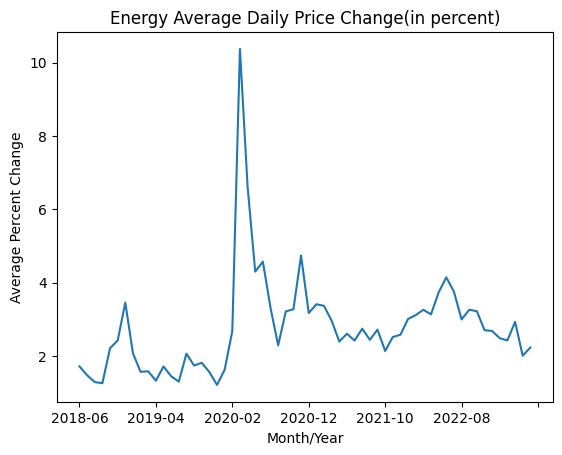

In [38]:
# Set the 'Year' column as the index

Energy_mean = Energy_mean.reset_index() # resetting the index corrects index to maintain column name integrIndustrialsy.
Energy_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
Energy_mean['diff_energy'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Energy Average Daily Price Change(in percent)')
plt.show()

### Industrials- Parse dates, calcuate mean, and generate visualization

In [39]:
# Extract year and month
Industrials_W['year_month'] = Industrials_W['Date'].dt.strftime('%Y-%m')

In [40]:
Industrials_W.head(2)

,Date,diff_Industrials,year_month
0,2023-05-30,0.989487,2023-05
1,2023-05-26,0.904577,2023-05


In [41]:
# Group the data by month and get the mean of the daily percent

Industrials_mean = Industrials_W.groupby('year_month')['diff_Industrials'].mean()

In [42]:
# resetting the index corrects index to maintain column name integrIndustrialsy.
Industrials_mean = Industrials_mean.reset_index()
Industrials_mean.head()

,year_month,diff_Industrials
0,2018-06,1.034474
1,2018-07,1.169607
2,2018-08,0.849912
3,2018-09,0.802598
4,2018-10,1.953039


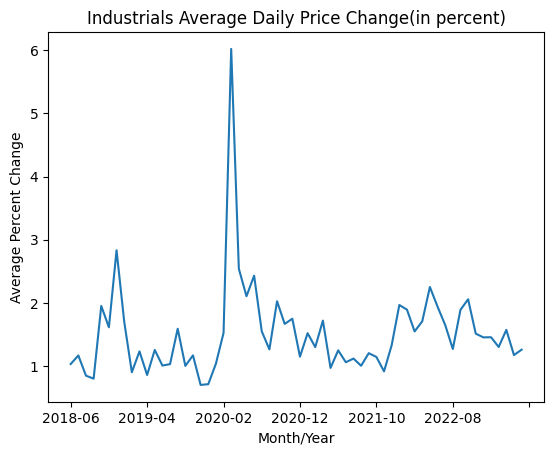

In [43]:
# Set the 'Year' column as the index

Industrials_mean = Industrials_mean.reset_index() # resetting the index corrects index to maintain column name integrIndustrialsy.
Industrials_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
Industrials_mean['diff_Industrials'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Industrials Average Daily Price Change(in percent)')
plt.show()

### CommS- Parse dates, calcuate mean, and generate visualization

In [44]:
# Extract year and month
CommS_W['year_month'] = CommS_W['Date'].dt.strftime('%Y-%m')

In [45]:
CommS_W.head(2)

,Date,diff_CommS,year_month
0,2023-05-30,1.552128,2023-05
1,2023-05-26,2.232121,2023-05


In [46]:
# Group the data by month and get the mean of the daily percent

CommS_mean = CommS_W.groupby('year_month')['diff_CommS'].mean()

In [47]:
# resetting the index corrects index to maintain column name integrIndustrialsy.
CommS_mean = CommS_mean.reset_index()
CommS_mean.head()

,year_month,diff_CommS
0,2018-06,1.718983
1,2018-07,1.403065
2,2018-08,1.073667
3,2018-09,1.355768
4,2018-10,2.526557


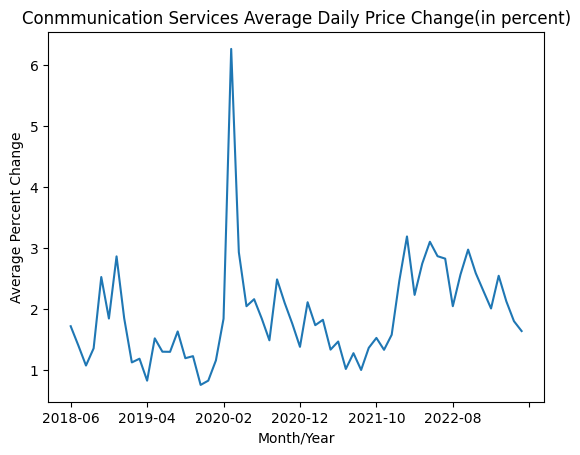

In [48]:
# Set the 'Year' column as the index

CommS_mean = CommS_mean.reset_index() # resetting the index corrects index to maintain column name integrIndustrialsy.
CommS_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axi

# Plotting the Inflation Data as a line graph
CommS_mean['diff_CommS'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Conmmunication Services Average Daily Price Change(in percent)')
plt.show()

### CStaples- Parse dates, calcuate mean, and generate visualization

In [49]:
CStaples_W['year_month'] = CStaples_W['Date'].dt.strftime('%Y-%m')

In [50]:
CStaples_W.head(2)

,Date,diff_CStaples,year_month
0,2023-05-30,1.079389,2023-05
1,2023-05-26,0.921009,2023-05


In [51]:
# Group the data by month and get the mean of the daily percent

CStaples_mean = CStaples_W.groupby('year_month')['diff_CStaples'].mean()

In [52]:
# resetting the index corrects index to maintain column name integrIndustrialsy.
CStaples_mean = CStaples_mean.reset_index()
CStaples_mean.head()

,year_month,diff_CStaples
0,2018-06,0.916466
1,2018-07,0.903865
2,2018-08,0.810503
3,2018-09,0.867854
4,2018-10,1.432647


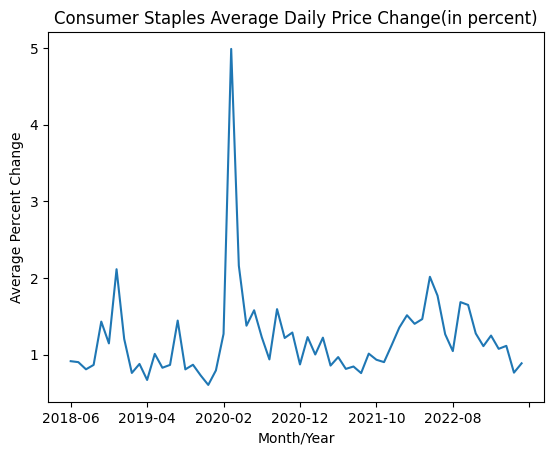

In [53]:
# Set the 'Year' column as the index

CStaples_mean = CStaples_mean.reset_index() # resetting the index corrects index to maintain column name integrIndustrialsy.
CStaples_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axi

# Plotting the Inflation Data as a line graph
CStaples_mean['diff_CStaples'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Consumer Staples Average Daily Price Change(in percent)')
plt.show()

# Now we combine the Datasets and put them all in one graph

In [54]:
# Merge materials Energy data and Industrials data
all_1 = pd.merge(Energy_mean, Industrials_mean, on='year_month', suffixes=('_mat', '_Industrials'))

In [55]:
all_1.head()

,index_mat,diff_energy,index_Industrials,diff_Industrials
year_month,,,,
2018-06,0,1.715445,0,1.034474
2018-07,1,1.474447,1,1.169607
2018-08,2,1.287871,2,0.849912
2018-09,3,1.256175,3,0.802598
2018-10,4,2.211363,4,1.953039


In [56]:
all_2 = pd.merge(CommS_mean, CStaples_mean, on='year_month', suffixes=('_mat', 'CStaples'))

In [57]:
all_1 = all_1.reset_index()
all_2 = all_2.reset_index()


# Merge all_1 wIndustrialsh Consumer Staples Data
all_3 = pd.merge(all_1, all_2, on='year_month',suffixes=('_all_1', 'all_2'))

In [58]:
all_3.head()

,year_month,index_mat_all_1,diff_energy,index_Industrials,diff_Industrials,index_matall_2,diff_CommS,indexCStaples,diff_CStaples
0,2018-06,0,1.715445,0,1.034474,0,1.718983,0,0.916466
1,2018-07,1,1.474447,1,1.169607,1,1.403065,1,0.903865
2,2018-08,2,1.287871,2,0.849912,2,1.073667,2,0.810503
3,2018-09,3,1.256175,3,0.802598,3,1.355768,3,0.867854
4,2018-10,4,2.211363,4,1.953039,4,2.526557,4,1.432647


In [59]:
# Select only necessary columnns for analysis
all_3 = all_3.reset_index()

all_4 = all_3[['year_month', 'diff_energy','diff_Industrials', 'diff_CommS', 'diff_CStaples']]

In [60]:
all_4.head()

,year_month,diff_energy,diff_Industrials,diff_CommS,diff_CStaples
0,2018-06,1.715445,1.034474,1.718983,0.916466
1,2018-07,1.474447,1.169607,1.403065,0.903865
2,2018-08,1.287871,0.849912,1.073667,0.810503
3,2018-09,1.256175,0.802598,1.355768,0.867854
4,2018-10,2.211363,1.953039,2.526557,1.432647


In [62]:
all_4.to_csv("../Data/all_4.JC.csv")

## Notice when all_3 is called wIndustrialshout .reset_index() the year_month column is indexed properly wIndustrialsh the other column names. 
> If you run all_3.columns 'year_month' will not display as a column name. Running .reset_index() remedies this

# Visualizing the combined data

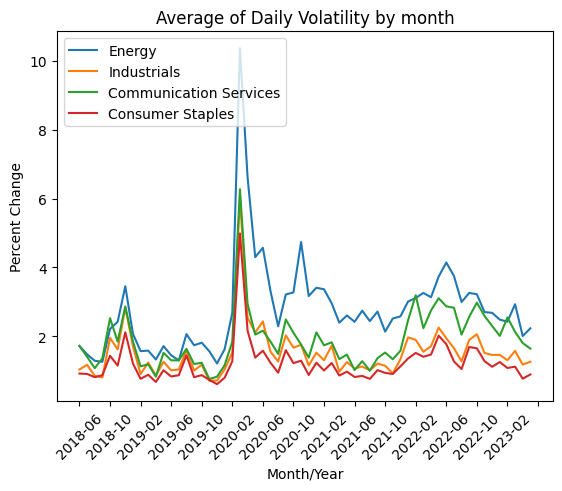

<Figure size 640x480 with 0 Axes>

In [63]:


# Set the 'Year' column as the index
all_4 = all_4.reset_index()
all_4.set_index('year_month', inplace=True)

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plotting the variables on the primary y-axis
ax1.plot(all_4['diff_energy'], label='Energy')
ax1.plot(all_4['diff_Industrials'], label='Industrials')
ax1.plot(all_4['diff_CommS'], label='Communication Services')
ax1.plot(all_4['diff_CStaples'], label='Consumer Staples')



# Set the labels and tIndustrialsle for the primary y-axis
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Percent Change')
ax1.set_title('Average of Daily Volatility by month')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=45)

#Sets amount of ticks shown on x-axis
ax1.xaxis.set_major_locator(plt.MaxNLocator(21))


# Display the legend for both y-axes
ax1.legend(loc='upper left') 


# Show the plot
plt.show()

#Imporves layout quality
plt.tight_layout()